$\large\textbf{Lab 6.} $



$\large\textbf{Exercise 1 : Direct least squares loss minimization}$

$\large\textbf{Que 1: }$


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [55]:
np.random.seed(1000)

In [56]:
A = np.random.randn(800, 2)
x1= np.random.uniform(low=-4,high=-2,size=None)
x2= np.random.uniform(low=6,high=8,size=None)
x_bar = np.random.uniform(low=x1, high=x2, size=(1,2))
x_bar = x_bar.T
epsilon = np.random.randn(800, 1)
A_x = np.matmul(A, x_bar)
y = A_x + epsilon

In [57]:
 def evalf(x):  
  assert type(x) is np.ndarray   
  fval = np.linalg.norm(np.matmul(A,x) - y)
  fval = 0.5 * (fval)**2
  return (fval)


In [58]:
def evalg(x):
  assert type(x) is np.ndarray 
  return np.matmul(A.T, np.matmul(A, x) - y)
np.size(evalg(x))

2

In [59]:
def evalh(x):
  assert type(x) is np.ndarray  
  return np.matmul(A.T,A)
(evalh(x))

array([[827.04498706,  13.89927695],
       [ 13.89927695, 817.62183184]])

In [71]:
def compute_B_k(s, y, B_k):
  I=np.identity(2)
  assert type(s) is np.ndarray 
  assert type(y) is np.ndarray 
  assert type(B_k) is np.ndarray
  mu = 1 / np.dot(np.squeeze(np.asarray(y)), np.squeeze(np.asarray(s)))
  a1 = np.outer(np.multiply(mu, s), np.transpose(y))
  a2 = np.outer(np.multiply(mu, y), np.transpose(s))
  a = np.subtract(I, a1)
  b = np.subtract(I, a2)
  c = np.outer(np.multiply(mu, s), np.transpose(s))
  d = np.matmul(np.matmul(a, B_k), b)
  z = np.add(d, c)
  return z

In [61]:
#line search type 
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1

In [62]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  mat = evalh(x)
  return np.linalg.inv(mat)

In [63]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma, B_k): 
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p = - gradf
  D_k = B_k
  
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha 

In [64]:
def find_minimizer_Newtonmethod(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray  
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x)
  h_x = evalh(x)

  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])
  k = 0
  x_array_newton = []
  f_array_newton = []
  step_length = 1.
  while (np.linalg.norm(g_x) > tol): 
    D_k = np.linalg.inv(evalh(x))
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma, D_k)
    elif line_search_type == CONSTANT_STEP_LENGTH: 
      step_length = 1.
    else:
      raise ValueError('Line search type unknown. Please check!')
    x_array_newton.append(math.log(np.linalg.norm(x - x_bar)))
    f_array_newton.append(math.log(np.linalg.norm(evalf(x) - evalf(x_bar))))  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) 
    k = k + 1
    g_x = evalg(x) 
  return x,  k, x_array_newton, f_array_newton

In [65]:
def find_minimizer_BFGS_scaling(start_x, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray 
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x)

  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  k = 0
  B_k = np.identity(2)
  x_old = x
  x_array_bfgs = []
  f_array_bfgs = []
  while (np.linalg.norm(g_x) > tol): 
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x_old, g_x, alpha_start, rho, gamma, B_k)
    elif line_search_type == CONSTANT_STEP_LENGTH: 
      step_length = 1.
    else:
      raise ValueError('Line search type unknown. Please check!')
    x_array_bfgs.append(math.log(np.linalg.norm(x_old - x_bar)))
    f_array_bfgs.append(math.log(np.linalg.norm(evalf(x_old) - evalf(x_bar))))
    x_new = np.subtract(x_old, np.multiply(step_length, np.matmul(B_k,g_x))) 
    g_x = evalg(x_new)
    s = np.subtract(x_new, x_old)
    y = np.subtract(evalg(x_new), evalg(x_old)) 
    B_k = compute_B_k(s, y, B_k)
    x_old = x_new
    k = k + 1
  return x_new, k, x_array_bfgs, f_array_bfgs

$\large\textbf{Que 2 : [R]}$

In [66]:
alpha = 0.9
rho = 0.5
gamma = 0.5
my_tol= 1e-5
my_start_x =np.zeros((2, 1))
x, k, x_array_newton, f_array_newton = find_minimizer_Newtonmethod(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
print('Values of x :\n',x ,'\nk=', k, "\n x_bar:", x_bar)
print("\n f(x):", evalf(x), "\n f_bar:", evalf(x_bar))

Values of x :
 [[-0.28778886]
 [ 0.81806887]] 
k= 8 
 x_bar: [[-0.27200121]
 [ 0.82821339]]

 f(x): 418.1964130916645 
 f_bar: 418.3437808895915


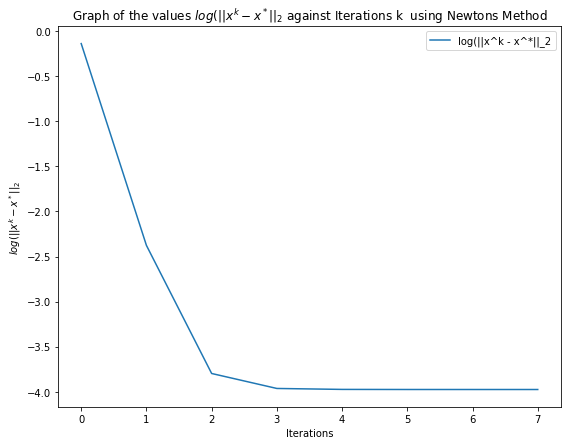

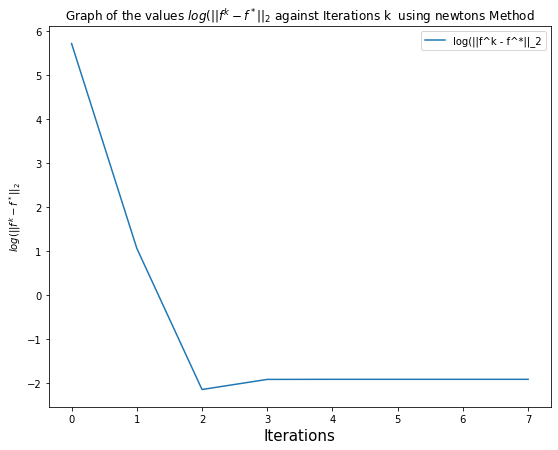

In [67]:
plt.figure(figsize=(9,7))
plt.plot([i for i in np.arange(len(x_array_newton))], x_array_newton,label=r'$ $')
plt.title(r'Graph of the values $log(||x^k - x^*||_2$ against Iterations k  using Newtons Method')
plt.xlabel(r'Iterations')
plt.ylabel(r'$log(||x^k - x^*||_2$')
plt.legend(['log(||x^k - x^*||_2'])
plt.show()

plt.figure(figsize=(9,7))
plt.plot([i for i in np.arange(len(f_array_newton))], f_array_newton,label=r'$ $')
plt.title(r'Graph of the values $log(||f^k - f^*||_2$ against Iterations k  using newtons Method')
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||f^k - f^*||_2$')
plt.legend(['log(||f^k - f^*||_2'])
plt.show()

$\large\textbf{• Comment on the convergence rates of the iterates and the objective function values}$

$\large\textbf{Ans : }$ We can clearly see in both graphs that  are converging towards a particular value hence both sequences are Q-linear,Q superlinear and Q-quadratic . Also we can see that no. of iterations decrease constantly.

$\large\textbf{Que 3 :}$

In [72]:
alpha = 0.9
rho = 0.5
gamma = 0.5
my_tol= 1e-5
my_start_x =np.zeros((2, 1))
x, k, x_array_bfgs, f_array_bfgs = find_minimizer_BFGS_scaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
print('Values of x:\n',x,'\nk=', k, "\nx_bar:", x_bar)
print("f(x):", evalf(x), "\nf_bar:", evalf(x_bar))

Values of x:
 [[-0.28778886]
 [ 0.81806887]] 
k= 10 
x_bar: [[-0.27200121]
 [ 0.82821339]]
f(x): 418.1964130916644 
f_bar: 418.3437808895915


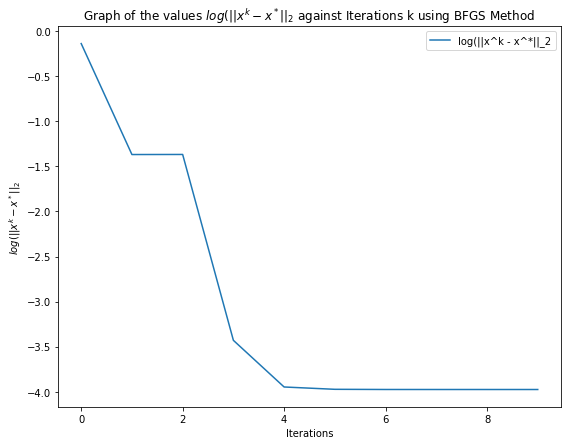

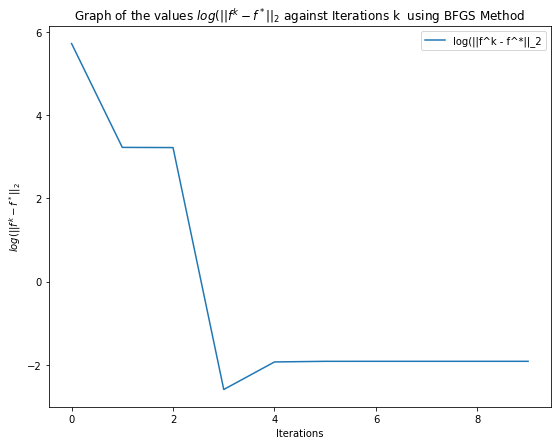

In [73]:
plt.figure(figsize=(9,7))
plt.plot([i for i in np.arange(len(x_array_bfgs))], x_array_bfgs,label=r'$ $')
plt.title(r'Graph of the values $log(||x^k - x^*||_2$ against Iterations k using BFGS Method')
plt.xlabel(r'Iterations')
plt.ylabel(r'$log(||x^k - x^*||_2$')
plt.legend(['log(||x^k - x^*||_2'])
plt.show()

plt.figure(figsize=(9,7))
plt.plot([i for i in np.arange(len(f_array_bfgs))], f_array_bfgs,label=r'$ $')
plt.title(r'Graph of the values $log(||f^k - f^*||_2$ against Iterations k  using BFGS Method')
plt.xlabel(r'Iterations')
plt.ylabel(r'$log(||f^k - f^*||_2$')
plt.legend(['log(||f^k - f^*||_2'])
plt.show()

$\Large\textbf{• Comment on the convergence rates of the iterates and the objective function values.}$


$\large\textbf{Ans : }$ We can clearly see that both graphs are converging towards a particular value hence both sequences are Q-linear,Q superlinear and Q-quadratic . Also we can see that no. of iterations decrease constantly.

$\large\textbf{Que 4:[R] Compare and contrast the results obtained by Newton’s method and BFGS method}$

$\large\textbf{Ans :}$ When we compare the both graphs the  difference is that the time taken by BFGS method  to converge is more than time taken by newton's method.